### Importing the necessary libraries

In [ ]:
from sklearn.datasets import fetch_20newsgroups
# a collection of 20k newsgrop document, devided into 20 different topics. post form usenet newsgroup, the subject including politics, computer, science, religion.

In [ ]:
from collections import Counter
# Counting the occurences of element in a list (Or any iretable)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# converting collection of a text document into a matrix of token counts. represent textual data in a suitable format for machine leatning algorithms that expect numerical input 

In [ ]:
from sklearn.model_selection import train_test_split
# splitting a datasets into training and testing subset. devide your data into into two separate sets to train your macine learning model on one subset and evaluate its performance on the other

In [ ]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB
# naive bayes commonl used for text classification task. 
# 'MultinominalNB'for multinominally distributed data. it assumes that the feature(in this case counts of a token in  a document) are generated from a multinominal distribution given the class  label 
#  'ComplementNB" handle inbalanced datasets and skewed class distribution

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
# Classification Report::
# generate a text report that provides a comprehensive summary of the main classificaton metrics for machine learning model. it takes a true lable and predicted label as an input and computes some several metrices, includding precission, recall, f1-score, and support for each class
# precision = measures how many of the prdicted positive instances are actually positive
# recall = measures how mamy of the actual positive instances are actually correctly predicted as positive
# f1-score = harmonic mean of precission and recall, providing a balanced meassure of model performance 
# support = the number of sample in each class

In [ ]:
# ConfusionMatrixDisplay::
# visualize the confusion matrix, which is tabular representation of the models prediction versus the true lable. helps to analyze the performance of a classification label.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Reading the database

In [ ]:
newsgroups = fetch_20newsgroups()
newsgroups

{'data': ["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
  "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washingto

In [ ]:
type(newsgroups)
# The sklearn.utils.Bunch is a simple container object in scikit-learn (sklearn) that is commonly used to store datasets or other collections of data. It is a dictionary-like object with attributes that can be accessed using dot notation.

# The Bunch class is designed to be lightweight and straightforward, providing a convenient way to store and pass around data within the scikit-learn ecosystem. It is often used to hold the features (data) and target (labels) of a dataset, but it can also be used to store other related information, such as metadata or additional attributes.

sklearn.utils.Bunch

In [ ]:
categories = newsgroups.target_names
categories
# the names or the labels associeted with the target variable in the dataset. common in supervised learning where you have a set of inputs features (data) corresponding target label. you can find it in text editor
# provides a way to associated human readable names or label with the numeric or categorical values of the target variable

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
# .data return the data only not subject and any other hash
# [0] return the first tweet
newsgroups.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [ ]:
newsgroups.target
# ther's contain of 20 number (0 - 19) each number represent the category of the news

array([7, 4, 4, ..., 3, 1, 8])

In [ ]:
Counter(newsgroups.target)
# count the occurenes of the element in a collection

Counter({7: 594,
         4: 578,
         1: 584,
         14: 593,
         16: 546,
         13: 594,
         3: 590,
         2: 591,
         8: 598,
         19: 377,
         6: 585,
         0: 480,
         12: 591,
         5: 593,
         10: 600,
         9: 597,
         15: 599,
         17: 564,
         18: 465,
         11: 595})

### Defining the inputs and the target

In [ ]:
newsgroups.target

array([7, 4, 4, ..., 3, 1, 8])

In [ ]:
inputs = newsgroups.data
target = newsgroups.target

In [ ]:
# the number of a news sample
len(target)

11314

### Creating the train-test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    inputs, target, 
    test_size=.2,
    random_state=44,
    stratify= target
)

x_train, x_test, y_train, y_test

(['From: markm@bigfoot.sps.mot.com (Mark Monninger)\nSubject: Re: Car buying story, was: Christ, another dealer service scam...\nNntp-Posting-Host: 223.250.10.7\nReply-To: rapw20@email.sps.mot.com\nOrganization: SPS\nDistribution: usa\nLines: 28\n\nIn article <1993Apr15.234508.20032@slcs.slb.com>  \ndcd@se.houston.geoquest.slb.com (Dan Day) writes:\n>   ...(relates an experience similar to mine) ...\n> Then comes the part I wish I could have videotaped.  As we go out\n> the front door, the sales manager SHOUTS across the entire showroom,\n> customers and all, "Go ahead!  You DESERVE to buy a Nissan!"\n> So my friend bought a Sentra.\n> ...\n\nThis kind of behavior is what I was shocked by in my \'experience\'. For  \ncrying out loud, how do these turkeys think they can talk to customers  \nthis way and still stay in business? Again, I don\'t expect sales people to  \nbow, scrape, and grovel in my presence but I sure don\'t expect to be  \nabused either. I was very surprised by the way 

In [ ]:
# we devide 90% for train and 20% for test
len(newsgroups.target) == len(y_train) + len(y_test)

True

In [ ]:
len(newsgroups.data) == len(x_train) + len(x_test)

True

### Tokenizing the youtube coments

In [ ]:
vectorizer = CountVectorizer()
vectorizer

CountVectorizer()

In [ ]:
x_train_transf = vectorizer.fit_transform(x_train)
x_train_transf
# 9,051 rows and 118,714 columns.
# sparse matrix = primarily contain 0 effective when dealing with high dimesnional data where most entries are 0 
# with 1438733 stored elements denotes the number of non-zero elements in the sparse matrix. These non-zero elements represent the token counts obtained from the text documents.
# in Compressed Sparse Row format indicates the specific format used to store the sparse matrix. The Compressed Sparse Row (CSR) format is a commonly used sparse matrix storage format that efficiently represents sparse matrices by storing only the non-zero elements and their corresponding row indices.

<9051x118714 sparse matrix of type '<class 'numpy.int64'>'
	with 1438733 stored elements in Compressed Sparse Row format>

In [ ]:
x_test_transf = vectorizer.transform(x_test)
x_test_transf

<2263x118714 sparse matrix of type '<class 'numpy.int64'>'
	with 336329 stored elements in Compressed Sparse Row format>

In [ ]:
x_train_transf, x_test_transf, y_train, y_test

(<9051x118714 sparse matrix of type '<class 'numpy.int64'>'
 	with 1438733 stored elements in Compressed Sparse Row format>,
 <2263x118714 sparse matrix of type '<class 'numpy.int64'>'
 	with 336329 stored elements in Compressed Sparse Row format>,
 array([ 7,  0,  6, ...,  4, 16, 10]),
 array([ 1,  4,  0, ..., 13, 18,  8]))

### Performing the classification

In [ ]:
clf = MultinomialNB()
clf

MultinomialNB()

In [ ]:
clf.fit(x_train_transf, y_train)
# fitting a classifier 'clf', to the training data 'x_train_transf', with their coresponding labels 'y_train'

MultinomialNB()

In [ ]:
x_train_transf

<9051x118714 sparse matrix of type '<class 'numpy.int64'>'
	with 1438733 stored elements in Compressed Sparse Row format>

In [ ]:
y_train

array([ 7,  0,  6, ...,  4, 16, 10])

### Performing the evaluation on the test dataset

In [ ]:
y_test_pred = clf.predict(x_test_transf)
y_test_pred

array([ 5,  5,  0, ..., 16, 18,  8])

In [ ]:
y_test

array([ 1,  4,  0, ..., 13, 18,  8])

In [ ]:
y_test_pred ==  y_test

array([False, False,  True, ..., False,  True,  True])

In [ ]:
len(y_test_pred) == len(y_test)

True

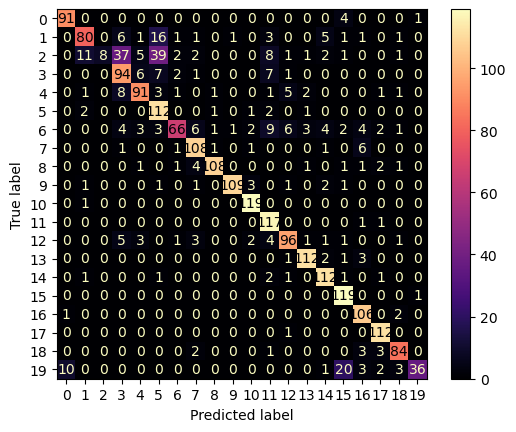

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels=clf.classes_,
    cmap='magma'
)

In [ ]:
clf.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [ ]:
print(classification_report(y_test, y_test_pred, target_names= categories))

                          precision    recall  f1-score   support

             alt.atheism       0.89      0.95      0.92        96
           comp.graphics       0.82      0.68      0.75       117
 comp.os.ms-windows.misc       1.00      0.07      0.13       118
comp.sys.ibm.pc.hardware       0.61      0.80      0.69       118
   comp.sys.mac.hardware       0.83      0.79      0.81       115
          comp.windows.x       0.62      0.94      0.74       119
            misc.forsale       0.88      0.56      0.69       117
               rec.autos       0.84      0.91      0.87       119
         rec.motorcycles       0.96      0.90      0.93       120
      rec.sport.baseball       0.98      0.92      0.95       119
        rec.sport.hockey       0.93      0.99      0.96       120
               sci.crypt       0.76      0.98      0.86       119
         sci.electronics       0.85      0.81      0.83       118
                 sci.med       0.93      0.94      0.93       119
         